In [1]:
from data_processing import Lang,prepareData

t=prepareData()

cpu
Reading lines...
Read 65528 sentence pairs
Trimmed to 65526 sentence pairs
Counting words...
Counted words:
zh 25079
en 15504


In [2]:
count=0
thefile=open("./dataset/train_en.txt")
while True:
    buffer=thefile.read(1024*8192)
    if not buffer:
        break
    count+=buffer.count('\n')
thefile.close()
print(count)

39315


In [2]:
input_lang, output_lang, pairs=t[:3]

In [3]:
from evaluate import *

In [4]:
from config import *

In [5]:
MODEL_PATH

'./model/v1.0.1'

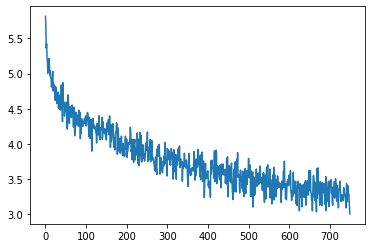

In [6]:
# if __name__=='__main__':
hidden_size = 256
encoder1 = EncoderRNN(input_lang.n_words, hidden_size).to(device)
encoder1_sd=torch.load(MODEL_PATH+'/encoder1.pt', map_location='cpu')
encoder1.load_state_dict(encoder1_sd)

attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words, dropout_p=0.1).to(device)
attn_decoder1_sd=torch.load(MODEL_PATH+'/attn_decoder1.pt', map_location='cpu')
attn_decoder1.load_state_dict(attn_decoder1_sd)
# trainIters(encoder1, attn_decoder1, 75000, print_every=5000)
plot_losses=torch.load(MODEL_PATH+'/plot_losses.pt', map_location='cpu')
plt.plot(plot_losses)
plt.savefig('loss_v1_0_1.jpg',dpi=400)

In [7]:
evaluateRandomly(input_lang, output_lang, pairs,encoder1, attn_decoder1)

> 我 知道 那 不会 真的 发生 。
= I know that can t really happen .
< I know that that that . . . . <EOS>

> 我 不 知道 故事 的 结局 。
= I don t know the end of the story .
< I don t know the story . <EOS>

> 我要 学法语 。
= I m going to study French .
< I want to study . . <EOS>

> 使用 这个 信息 时 ， 我 当然 会 遵循 您 的 要求 。
= When using this information I will of course follow your requirements .
< I would you to you of the . . . <EOS>

> 火车 以 每 小时 50 英里 的 速度 前行 。
= The train is going at a speed of miles per hour .
< The train has an in in the . <EOS>

> 接着 又 有 三个 人上 了 巴士 。
= Three more passengers got on the bus .
< There is two three hours three hours . <EOS>

> 你 能 准时 做好 吗 ？
= Can you make it on time ?
< Could you get it ? ? <EOS>

> 我 将要 去 参加 会议 。
= I will go to the meeting .
< I go going to the . <EOS>

> 你 不是 我 的 朋友 了 。
= You re not my friend anymore .
< You re my friend friend . <EOS>

> 我 感觉 你 想 告诉 我 什么 事 。
= I get the feeling you re trying to tell me something .
< I want to know what you want to . <EOS>



In [8]:
import jieba

In [9]:
def translate(cn_sentence):
    cn_cut=' '.join(jieba.cut(cn_sentence))
    print(cn_cut)
    en_cut=evaluate(input_lang, output_lang, pairs,encoder1, attn_decoder1, cn_cut)[0]
    return ' '.join(en_cut)

In [10]:
translate('我喜欢吃苹果')

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.871 seconds.
Prefix dict has been built successfully.


我 喜欢 吃 苹果


'I like apples . <EOS>'

In [7]:
from torchtext.data.metrics import bleu_score
candidate_corpus = [['My', 'full', 'pytorch', 'test'], ['Another', 'Sentence']]
references_corpus = [[['My', 'full', 'pytorch', 'test'], ['Completely', 'Different']], [['No', 'Match']]]
bleu_score(candidate_corpus, references_corpus)

0.8408964276313782

In [21]:
a=['arrests ', 'Cup ', 'studies ', 'aura ', 'ni ', 'pull ', 'invasion ', 'chart ', 'Pearl ', 'Most ', 'Most ', 'Zhou ', 'Zhou ', 'awkward ']
b=['Tom', 'doesn', 't', 'pay', 'attention', 'in', 'school', '.']
# bleu_score([a],[[b]])

In [22]:
for i in range(len(a)):
    a[i]=a[i][:-1]

In [24]:
bleu_score([a],[[b]])

0.0

In [14]:
a='I don t know the end of the story .'
b='I don t know the story .'
bleu_score([a.split(' ')],[[b.split(' ')]])

0.5081327557563782

In [16]:
b.split(' ')

['I', 'don', 't', 'know', 'the', 'story', '.']

In [15]:
a.split(' ')

['I', 'don', 't', 'know', 'the', 'end', 'of', 'the', 'story', '.']

In [ ]:
# I get the feeling you re trying to tell me something .
# < I want to know what you want to . <EOS>